## Getting Started with Naive Bayes 

Much of this is taken from the documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

In [45]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [147]:
# get a data set
X, y = load_wine(return_X_y=True)

# optional: view it 
df = pd.DataFrame(np.concatenate((X,y.reshape((178,1))), axis=1))
df.columns = [ 'x'+str(i+1) for i in range(13)] + ['y'] 
df.sample(10).head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
76,13.03,0.90,1.71,16.0,86.0,1.95,2.03,0.24,1.46,4.60,1.190,2.48,392.0,1.0
70,12.29,1.61,2.21,20.4,103.0,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870.0,1.0
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.970,2.44,466.0,1.0
47,13.90,1.68,2.12,16.0,101.0,3.10,3.39,0.21,2.14,6.10,0.910,3.33,985.0,0.0
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.690,2.84,352.0,1.0


In [72]:
# checking independence (naiveness)
df[df.y == 0].drop(['y'], axis=1).corr()
#df[df.y == 1].drop(['y'], axis=1).corr()
#df[df.y == 2].drop(['y'], axis=1).corr()
# more advanced option: hypothesis tests

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
x1,1.000000,-0.040513,-0.148595,-0.318367,0.159361,0.420687,0.414904,0.015659,0.307571,0.408291,0.080020,0.069818,0.360646
x2,-0.040513,1.000000,0.026221,0.060031,0.079317,-0.083514,-0.191278,-0.089366,-0.080798,-0.257587,-0.419981,0.173244,-0.372629
x3,-0.148595,0.026221,1.000000,0.549330,0.382549,0.004802,-0.070454,0.465901,-0.145471,-0.124220,0.239214,-0.081593,-0.029525
x4,-0.318367,0.060031,0.549330,1.000000,0.238337,-0.222999,-0.287103,0.302262,-0.173628,-0.210951,0.092980,-0.117704,-0.122436
x5,0.159361,0.079317,0.382549,0.238337,1.000000,0.307241,0.123332,0.237248,-0.059042,0.184661,-0.111386,0.120651,-0.147912
x6,0.420687,-0.083514,0.004802,-0.222999,0.307241,1.000000,0.803784,-0.016992,0.373601,0.650086,-0.224330,0.053165,0.294994
x7,0.414904,-0.191278,-0.070454,-0.287103,0.123332,0.803784,1.000000,-0.089538,0.548624,0.741560,0.007863,-0.088529,0.380446
x8,0.015659,-0.089366,0.465901,0.302262,0.237248,-0.016992,-0.089538,1.000000,-0.144535,-0.152460,0.411831,-0.323488,-0.015333
x9,0.307571,-0.080798,-0.145471,-0.173628,-0.059042,0.373601,0.548624,-0.144535,1.000000,0.424696,0.103937,0.003106,0.142166
x10,0.408291,-0.257587,-0.124220,-0.210951,0.184661,0.650086,0.741560,-0.152460,0.424696,1.000000,0.028228,-0.186899,0.588770


array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>],
       [<AxesSubplot:title={'center':'x5'}>,
        <AxesSubplot:title={'center':'x6'}>,
        <AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>],
       [<AxesSubplot:title={'center':'x9'}>,
        <AxesSubplot:title={'center':'x10'}>,
        <AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>],
       [<AxesSubplot:title={'center':'x13'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

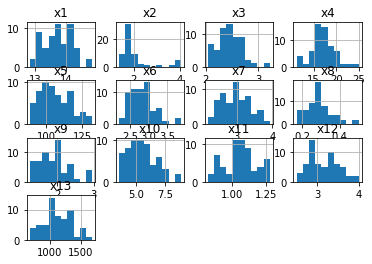

In [73]:
# check normality
df[df.y==0].drop(['y'], axis=1).hist()
#df[df.y==1].drop(['y'], axis=1).hist()
#df[df.y==2].drop(['y'], axis=1).hist()

In [151]:
gnb = GaussianNB()
estimated_model = gnb.fit(X,y)
estimated_model.class_prior_
# estimated_model.theta_ # mean params
# estimated_model.sigma_ # std. dev. params

array([0.33146067, 0.3988764 , 0.26966292])

In [167]:
#prediction on test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
y_pred = GaussianNB().fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 89 points : 2
